<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Tarea semanal 8

### Axel Nathanel Nahum


### Introducción

<img src="./Recording-ECG.jpg" align="right" width="150" style="border:10px solid white" /> 


El electrocardiograma de superficie (ECG) es una medición no invasiva del potencial eléctrico producido por el dipolo eléctrico resultante en cada célula cardíaca. Por lo general, para la medición del ECG se colocan electrodos en las extremidades del cuerpo y sobre la superficie del torso, como se aprecia en la figura. Debido a que es una técnica no invasiva y su costo no es elevado, es ampliamente utilizada en la clínica médica para conocer la funcionalidad del corazón. Habitualmente se miden entre una y doce señales de ECG dependiendo de la patología bajo análisis.


<img src="./ergo_iss.jpg" align="left" width="350" style="border:10px solid white" /> 


La señal de ECG también es afectada por los campos eléctricos generados por todas las otras fuentes biológicas del organismo bajo estudio (ruido muscular), como también por otros factores como el movimiento de los electrodos sobre la piel y el acople de la línea eléctrica (50/60 Hz) entre otros. Una de las primeras tareas previas al análisis del ECG es el filtrado de interferencias. En el siguiente ejemplo, procederemos al filtrado de un ECG registrado durante una prueba de esfuerzo o ergometría. En dichos registros, las interferencias musculares son muy exageradas dado al esfuerzo físico al que es sometido el paciente.


Para tal fin, se procede a procesar la señal de ECG con diferentes filtros recursivos, o de respuesta infinita al impulso (IIR), como también filtros no recursivos, o de respuesta finita al impulso (FIR). Dichos filtros han sido presentados en clase, por lo que en el siguiente documento evaluaremos su desempeño de forma cualitativa en señales reales.

    

### Experimentación

Utilizaremos un registro de ECG proveniente de una prueba ergonométrica o de esfuerzo. El mismo ha sido digitalizado a una frecuencia de muestreo de 1000 Hz, y se encuentra guardado en el archivo *ecg.mat*.

Los filtros digitales pueden ser clasificados como recursivos o no recursivos, aunque en la asignatura lo hacemos dependiendo del soporte temporal de la respuesta al impulso. Es decir de respuesta finita (FIR) o infinita al impulso (IIR). Durante la primera parte de la asignatura, estudiamos diferentes aproximaciones a la respuesta ideal de un filtro, como la de Butterworth, Chebyshev y Bessel. En cada caso, logramos obtener una función matemática, es decir una función transferencia en el dominio de la frecuencia compleja $T(s)$, que luego se implementa mediante un circuito electrónico analógico. Luego hemos visto que $T(s)$ puede discretizarse, y en consecuencia modelar el comportamiento de un sistema digital, o muestreado a $T_S=1/f_S$ mediante la [transformada bilineal](http://nbviewer.jupyter.org/github/spatialaudio/digital-signal-processing-lecture/blob/master/filter_design/bilinear_transform.ipynb), es decir $s = 2 \, f_S \cdot \frac{z - 1}{z + 1}$

\begin{equation}
T(z) = T(s) \Big\vert_{s = 2 \,f_S \cdot \frac{z - 1}{z + 1}}
\end{equation}

Es decir, dada una sección de segundo orden (SOS) analógica

\begin{equation}
T(s) = \frac{\beta_0 + \beta_1 s + \beta_2 s^2}{\alpha_0 + \alpha_1 s + \alpha_2 s^2}
\end{equation}

su equivalente digital $T(z)$ también podrá expresarse como un cociente de polinomios en $z$, aunque como hemos visto, por razones de implementación lo haremos respecto a $z^{-1}$

\begin{equation}
T(z) = \frac{(\beta_2 K^2 - \beta_1 K + \beta_0) \, z^{-2} + (2 \beta_0 - 2 \beta_2 K^2) \,  z^{-1} + (\beta_2 K^2 + \beta_1 K + \beta_0)}
{(\alpha_2 K^2 - \alpha_1 K + \alpha_0) \, z^{-2} + (2 \alpha_0 - 2 \alpha_2 K^2) \,  z^{-1} + (\alpha_2 K^2 + \alpha_1 K + \alpha_0)}
\end{equation}
donde $K = 2f_S$.

Para luego reescribir $T(z)$ en función de los coeficientes del sistema muestreado $b_m$ y $a_n$

\begin{equation}
T(z) = \frac{Y(z)}{X(z)} = \frac{ b_2 \, z^{-2} + b_1 \,  z^{-1} + b_0 }
{a_2 \, z^{-2} + a_1 \,  z^{-1} + a_0}
\end{equation}

obteniendo también una SOS como era de esperar, dado que la transformada bilineal es una transformación conforme. Una vez obtenida nuestra $T(z)$ de orden arbitrario, solo resta partir la transferencia en subsecciones de segundo orden (SOS). Para ello, es necesario conocer tanto la [estructura](http://nbviewer.jupyter.org/github/spatialaudio/digital-signal-processing-lecture/blob/master/recursive_filters/direct_forms.ipynb) como la forma en que nuestro paquete de software implementa las [SOS's](http://nbviewer.jupyter.org/github/spatialaudio/digital-signal-processing-lecture/blob/master/recursive_filters/cascaded_structures.ipynb)
e. En el caso de *SciPy*, cuenta con una familia de funciones donde es muy sencillo diseñar y utilizar filtros digitales implementados como SOS's, como se verá en la implementación.

Para llegar a la implementación de nuestro filtro digital $T(z)$, se despeja $Y(z)$

\begin{equation}
Y(z) =  \frac{1}{a_0} \left( \sum_{m=0}^{M} b_m \, X(z) \, z^{-m} - \sum_{n=1}^{N} a_n \, Y(z) \, z^{-n} \right)
\end{equation}

finalmente se obtiene $y[k]$ por simple inspección sabiendo que $y[k-m] = Y(z) \, z^{-m}$

\begin{equation}
y[k] = \frac{1}{a_0} \left( \sum_{m=0}^{M} b_m \; x[k-m] - \sum_{n=1}^{N} a_n \; y[k-n] \right) \label{eq:ec_dif}
\end{equation}

Esta ecuación nos permite conocer el valor de la salida actual, y se la conoce como *ecuación de diferencias*. Esta misma ecuación es lo suficientemente general para la implementación de filtros IIR, como también de los FIR. Basta con hacer $a_n = 0$ para que la ec. \eqref{eq:ec_dif} se convierta en la convolución discreta entre $x[k]$ y la respuesta al impulso finita, dada por $b[m]=(b_0, b_1, \cdots, b_M)$. Los coeficientes $b_m$ del filtro FIR, pueden calcularse por ejemplo, mediante el [método de ventanas](http://nbviewer.jupyter.org/github/spatialaudio/digital-signal-processing-lecture/blob/master/filter_design/window_method.ipynb), entre [otros](http://nbviewer.jupyter.org/github/spatialaudio/digital-signal-processing-lecture/blob/master/filter_design/frequency_sampling_method.ipynb).

Como se trata de un análisis *offline* utilizando una arquitectura computacional sin limitaciones numéricas, como las provistas por las librerías SciPy y NumPy, algunos problemas relacionados a la implementación con aritmética y palabras de cuantización finitas no son tenidos en cuenta. Se refiere a los estudiantes interesados a los siguientes documentos acerca de [errores por la cuantización de coeficientes](http://nbviewer.jupyter.org/github/spatialaudio/digital-signal-processing-lecture/blob/master/recursive_filters/quantization_of_coefficients.ipynb) y por una unidades aritméticas limitadas [(1, ](http://nbviewer.jupyter.org/github/spatialaudio/digital-signal-processing-lecture/blob/master/recursive_filters/quantization_of_variables.ipynb) [2)](http://nbviewer.jupyter.org/github/spatialaudio/digital-signal-processing-lecture/blob/master/nonrecursive_filters/quantization_effects.ipynb). También se le recomienda a los estudiantes interesados revisar las asignaturas optativas relacionadas al [Procesamiento Digital de Señales (DSP)](https://www.campusvirtual.frba.utn.edu.ar/especialidad/course/view.php?id=1070), como también al [DSP en tiempo real](https://www.campusvirtual.frba.utn.edu.ar/especialidad/course/view.php?id=300).

## Parte 1: Diseño de filtros

Primero procedemos a diseñar los filtros que cumplan con la plantilla, para ello se pide completar el siguiente script, tomando como referencia el siguiente código base.

In [5]:
# Inicialización e importación de módulos

# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

# Módulos importantantes
import scipy.signal as sig
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from pytc2.sistemas_lineales import plot_plantilla

fig_sz_x = 10
fig_sz_y = 7
fig_dpi = 100 # dpi

fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x,fig_sz_y)
plt.rcParams.update({'font.size':fig_font_size})

###
## Señal de ECG registrada a 1 kHz, con contaminación de diversos orígenes.
###

# para listar las variables que hay en el archivo
#io.whosmat('ecg.mat')
mat_struct = sio.loadmat('ecg.mat')

ecg_one_lead = mat_struct['ecg_lead']
ecg_one_lead = ecg_one_lead.flatten()
cant_muestras = len(ecg_one_lead)

fs = 1000 # Hz
nyq_frec = fs / 2

In [6]:
# Plantilla

# filter design
ripple = 0 # dB
atenuacion = 40 # dB

ws1 = 1.0 #Hz
wp1 = 3.0 #Hz
wp2 = 25.0 #Hz
ws2 = 35.0 #Hz

frecs = np.array([0.0,         ws1,         wp1,     wp2,     ws2,         nyq_frec   ]) / nyq_frec
gains = np.array([-atenuacion, -atenuacion, -ripple, -ripple, -atenuacion, -atenuacion])
gains = 10**(gains/20)


<img src="./plantilla.svg" align="center" width="700" /> 


Puede diseñar el filtro IIR como *second order sections* (SOS's) siguiendo cualquiera de los métodos estudiados en clase:
+ bilineal
+ PyFDA (diseñando con GUI, copiando, pegando y convirtiendo a SOS)

```
Out[1]: bp_sos_butter = array([[ 5.65513456e-18,  1.13102691e-17,  5.65513456e-18,
         1.00000000e+00, -1.76642611e+00,  7.81177826e-01],
       [ 1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         1.00000000e+00, -1.77396702e+00,  7.90822319e-01],
       [...]
       [ 1.00000000e+00, -2.00000000e+00,  1.00000000e+00,
         1.00000000e+00, -1.99667245e+00,  9.96990703e-01]])

Out[2]: bp_sos_butter.shape
Out[2]: (15, 6)
```

Recordar que una SOS se define en SciPy Signal como:

 "Array of second-order filter coefficients, must have shape (n_sections, 6). 
  Each row corresponds to a second-order section, with the first three columns
  providing the numerator coefficients and the last three providing the 
  denominator coefficients."

+ o los métodos directos, que son los más recomendables:

```
bp_sos_butter = sig.iirdesign( ##COMPLETAR## )
bp_sos_cheby = ...
bp_sos_cauer = ...
bp_sos_OTROS = ...
```

Con respecto a los FIR, también puede utilizarse PyFDA, solo que para este caso, solo basta con copiar los coeficientes del NUMERADOR $b_n$.

```
In [1]: num_firls_hp = np.array([-5.67064487e-05, -5.57043841e-05, -5.46667232e-05, ...,
               -5.46667232e-05, -5.57043841e-05, -5.67064487e-05])
Out[1]: array([-5.67064487e-05, -5.57043841e-05, -5.46667232e-05, ...,
               -5.46667232e-05, -5.57043841e-05, -5.67064487e-05])

In [2]: num_firls_hp.shape
Out[2]: (1001,)
```

Intentar **SIEMPRE** que el tamaño del filtro tenga un retardo **ENTERO**.

También puede utilizar las funciones de diseño de filtros FIR de SciPy:

```
In [1]: num_firls_hp = sig.firls( ... )
In [2]: num_remez_hp = sig.remez( ... )
In [3]: num_win      = sig.firwin2( ... )

```

A continuación hay un ejemplo.


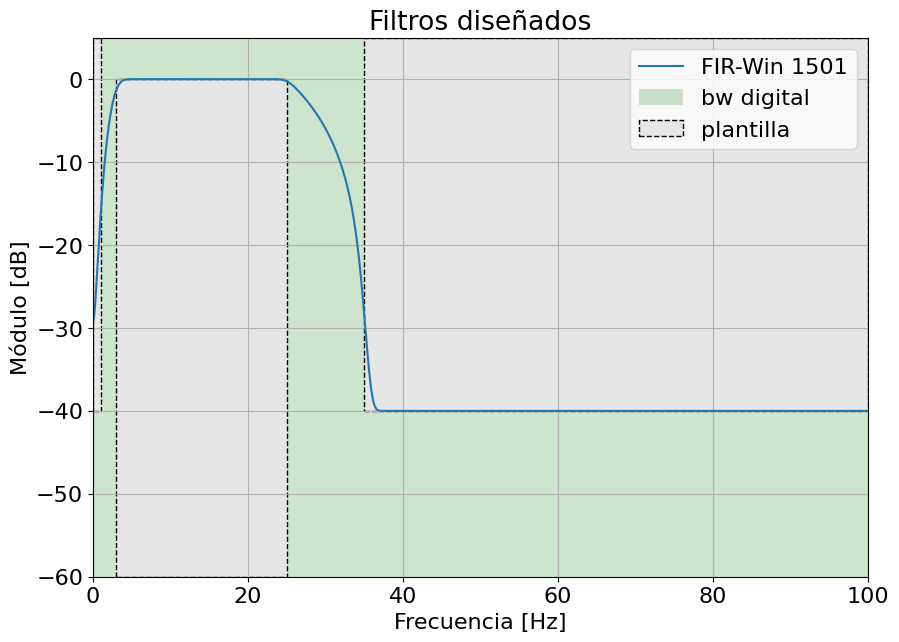

In [7]:
cant_coeficientes = 1501

num_win = sig.firwin2(cant_coeficientes, frecs, gains , window='blackmanharris' )

den = 1.0

# muestreo el filtro donde me interesa verlo según la plantilla.
w  = np.append(np.logspace(-1, 0.8, 250), np.logspace(0.9, 1.6, 250) )
w  = np.append(w, np.linspace(110, nyq_frec, 100, endpoint=True) ) / nyq_frec * np.pi

_, hh_win = sig.freqz(num_win, den, w)

# renormalizo el eje de frecuencia
w = w / np.pi * nyq_frec

plt.plot(w, 20 * np.log10(abs(hh_win)), label='FIR-Win {:d}'.format(num_win.shape[0]))

plt.title('Filtros diseñados')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, 100, -60, 5 ]);

axes_hdl = plt.gca()
axes_hdl.legend()

plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)


## Parte 2

Una vez diseñados los filtros procedemos a utilizarlos. Para ello SciPy dispone de dos implementaciones de la ecuación de diferencias, la tradicional mediante **lfilter** y la variante por SOS's mediante **sosfilt**. La primera puede usarse para filtros FIR de cualquier tamaño, e IIR de bajo orden (<= 3 secciones u orden 6), mientras que la segunda es **obligatoria** para filtros IIR de orden superior.

In [8]:
# IIR
# ECG_f_butt = sig.sosfilt(bp_sos_butter, ecg_one_lead)

# FIR
ECG_f_win = sig.lfilter(num_win, den, ecg_one_lead)

Ahora visualizamos los resultados, para ello se cuenta con diferentes regiones de interés (ROI's) para poder evaluar qué tan bien se comportan los filtros diseñados. Primero revisaremos zonas de **alta contaminación** para evaluar qué tan eficiente es el filtrado.

Recordar que **cada filtro impone una demora a la señal filtrada**, por lo tanto, dicha demora puede corregirse para cada filtro retrasando la señal de entrada o adelantando la señal de salida. Recuerde que como la señal ya fue registrada, una secuencia puede *adelantarse*.

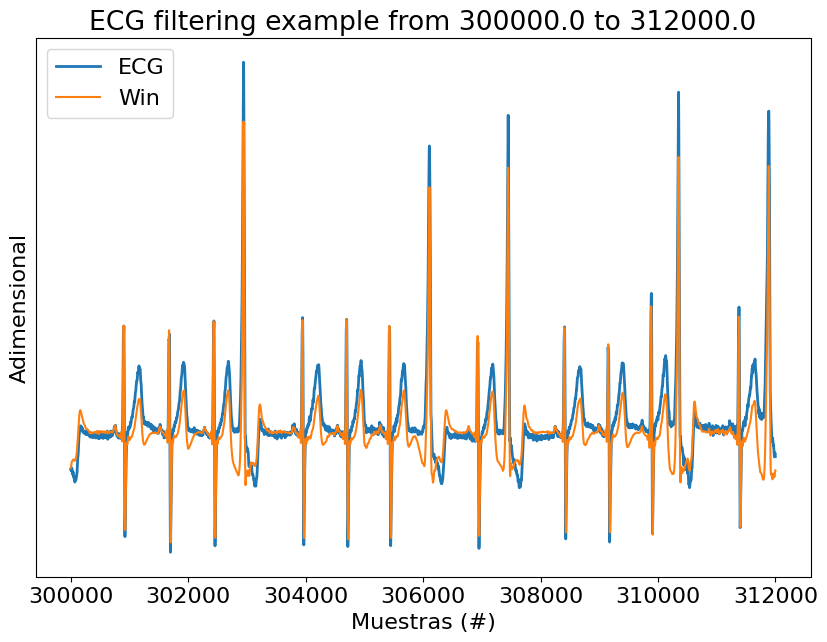

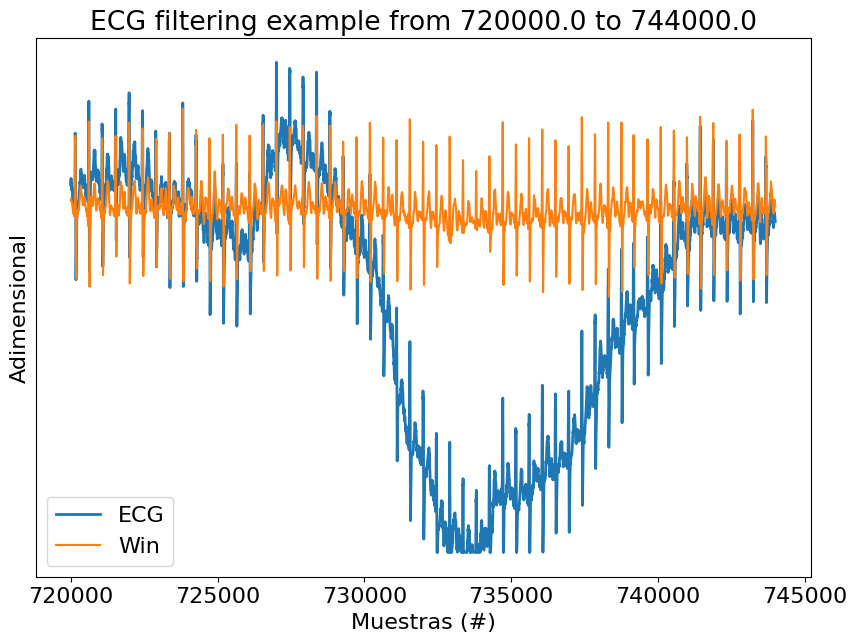

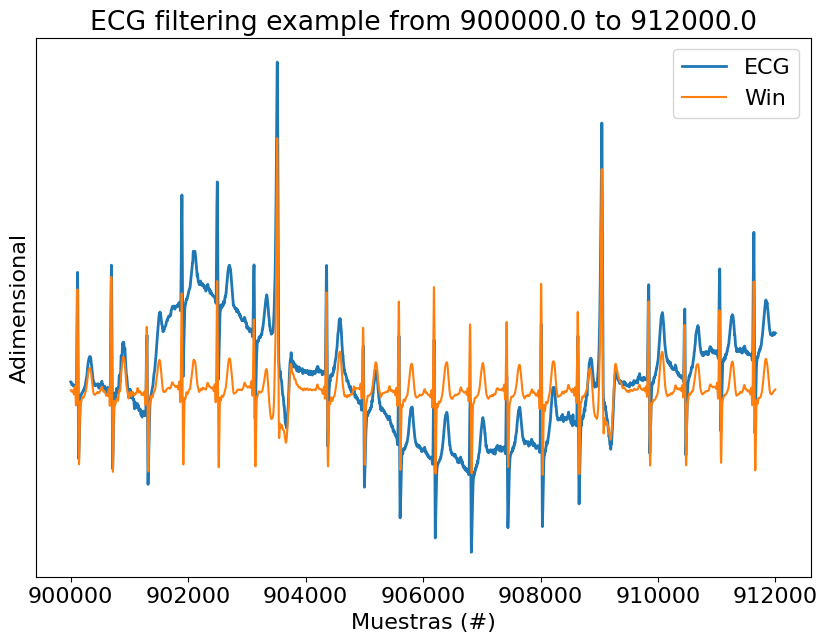

In [9]:
# demora = int(...)
# calcule la demora para cada caso, dicha demora adelantará la señal de salida, como puede ver más abajo.
demora = 750


# Segmentos de interés con ALTA contaminación

regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    #plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    plt.plot(zoom_region, ECG_f_win[zoom_region + demora], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

Al analizar el efecto del filtrado, observamos que la señal original de ECG (en azul) posee contaminación de baja frecuencia en algunas zonas del registro. Dicha contaminación probablemente se deba al aumento de la actividad física durante la prueba de esfuerzo. Como se observa, la mayor parte de las técnicas de filtrados es *inocua* cuando no hay contaminación de baja frecuencia, y remueve los movimientos de la línea de base correctamente.

Ahora analizaremos cómo se han comportado los filtros analizando la señal en detalle para algunos latidos **con baja contaminación**, es decir qué tan **inocuo** es el filtro en su banda de paso. Desde luego nos interesará que la señal de ECG no haya sido alterada en su morfología, debido a que esto podría imposibilitar su uso como método de diagnóstico. 

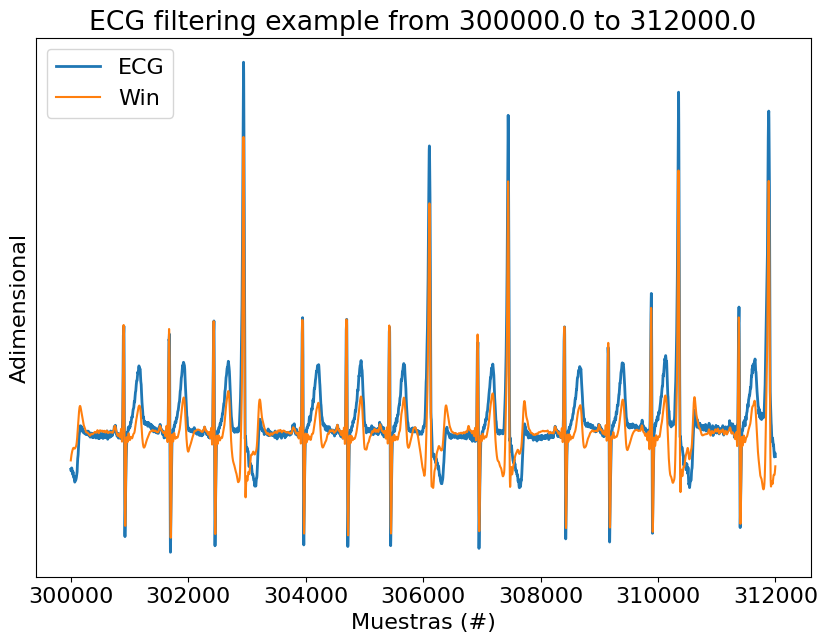

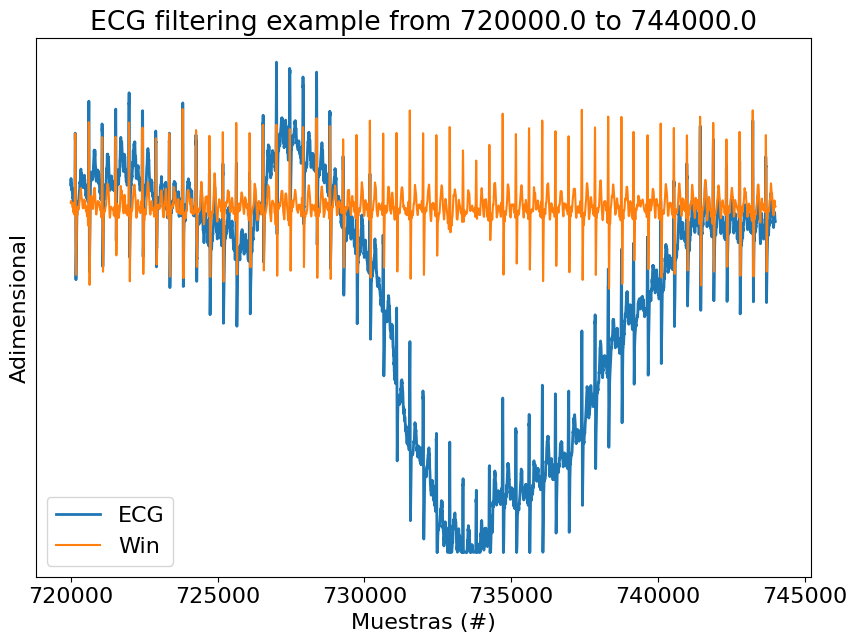

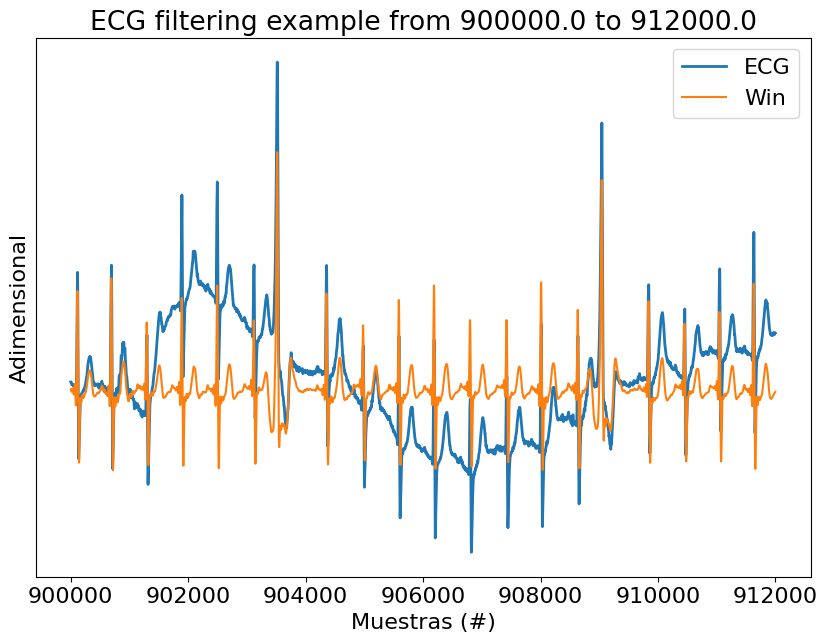

In [10]:
# Procedemos al filtrado
# ECG_f_butt = sig.sosfiltfilt(bp_sos_butter, ecg_one_lead)

ECG_f_win = sig.filtfilt(num_win, den, ecg_one_lead)

# Segmentos de interés
regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', lw=2)
    #plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    plt.plot(zoom_region, ECG_f_win[zoom_region], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

Finalmente implementaremos **los mismos filtros** con una técnica diferente llamada *filtrado bidireccional* *[scipy.signal.filtfilt](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.filtfilt.html)*.

El filtrado bidireccional es una técnica sumamente conveniente al momento de filtrar digitalmente una señal, dado que evita por completo cualquier distorsión de fase. Esto afecta principalmente a los filtros IIR, donde las distorsiones pueden ser notorias. Sin embargo, los filtros FIR cuya respuesta al impulso sea simétrica (par o simpar), **no** producen distorsión de fase debido a que su fase **es lineal**. 

En ambos casos, tanto para los IIR como para los FIR, simétricos o no, el resultado es una anulación completa de la respuesta de fase, obteniéndose así un **filtro de fase cero**. Recordemos que la transformada de Fourier de la inversión en tiempo es 

\begin{equation}
x[-k] \stackrel{\mathrm{DFT}}{\longleftrightarrow} X^*(e^{j \, \Omega })
\end{equation}

Por lo tanto, vemos que la inversión en tiempo conlleva la negación de la respuesta de fase de una señal. Entonces utilizaremos una doble inversión temporal para cancelar los efectos de fase, y al mismo tiempo el resultado neto sobre la señal espejada dos veces será nulo

\begin{equation}
Y(e^{j \, \Omega }) = X(e^{j \, \Omega }) \cdot T^*(e^{j \, \Omega }) \cdot T(e^{j \, \Omega }) 
\end{equation}

\begin{equation}
Y = X \cdot |T|^2
\end{equation}

*(Se simplificó la notación para clarificar el resultado)* Se observa como resultado de aplicar el método bidireccional un filtro equivalente al cuadrado del módulo y con aporte nulo de fase para todas las frecuencias. Esto equivale a haber atravesado dos veces por el mismo filtro, por lo tanto la atenuación será el doble que la del filtro original (y el *ripple* en banda también!) razón por lo cual debe modificarse la plantilla de diseño **relajando a la mitad** la atenuación, es decir exigiendo menos atenuación, pero **duplicando** la exigencia de ripple, es decir dividiendo por dos el ripple.

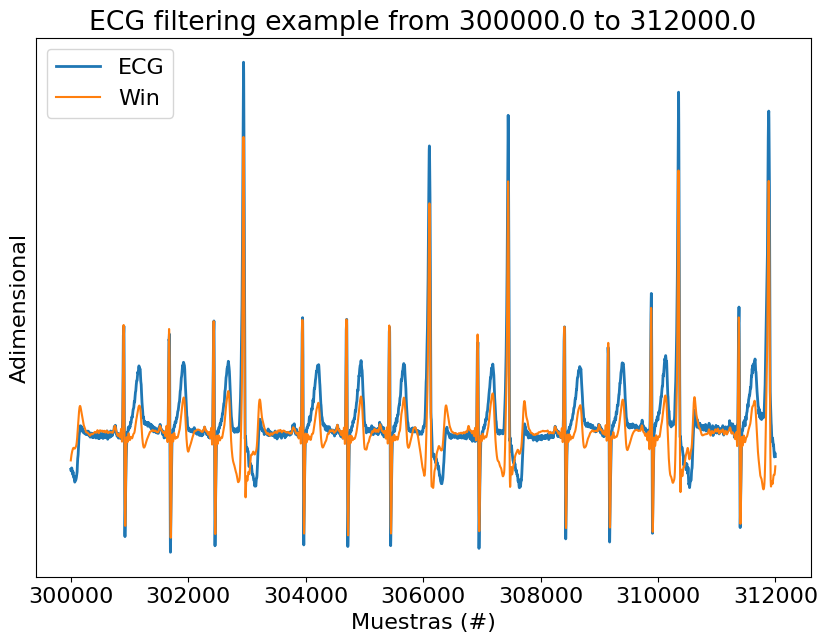

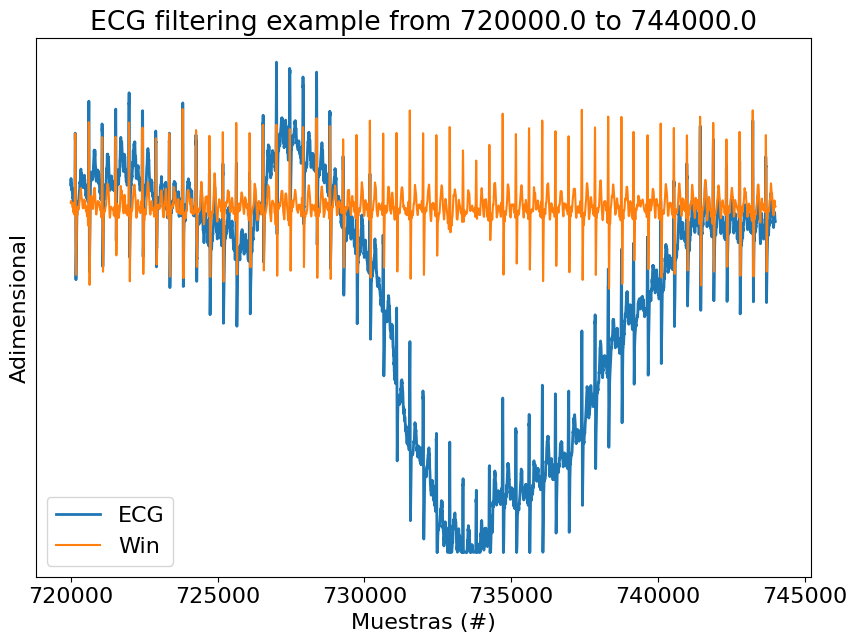

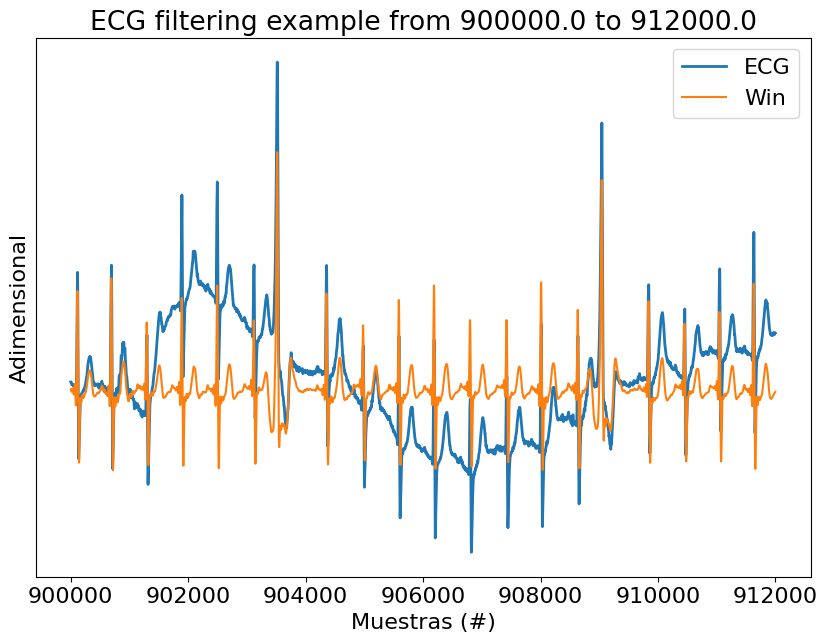

In [11]:
# Procedemos al filtrado
# ECG_f_butt = sig.sosfiltfilt(bp_sos_butter, ecg_one_lead)

ECG_f_win = sig.filtfilt(num_win, den, ecg_one_lead)

# Segmentos de interés
regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', lw=2)
    #plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    plt.plot(zoom_region, ECG_f_win[zoom_region], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

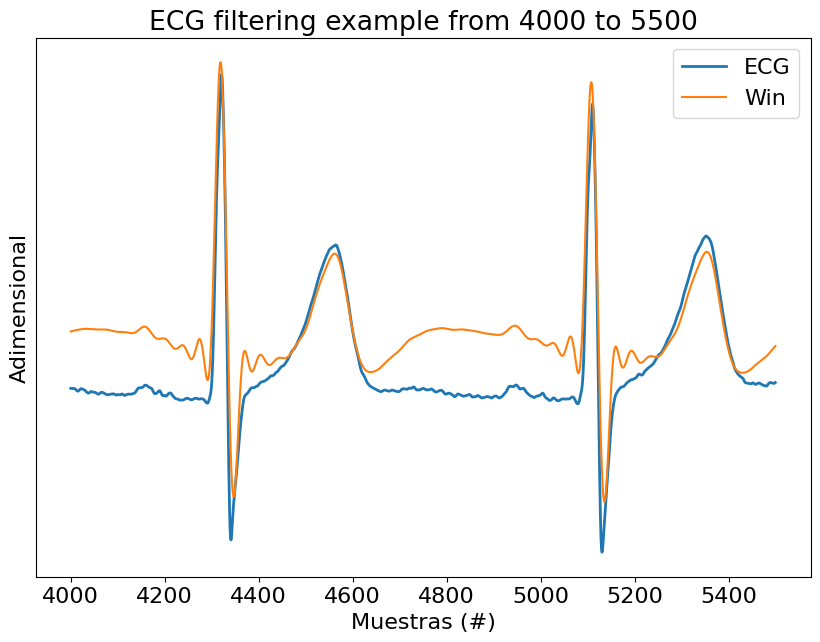

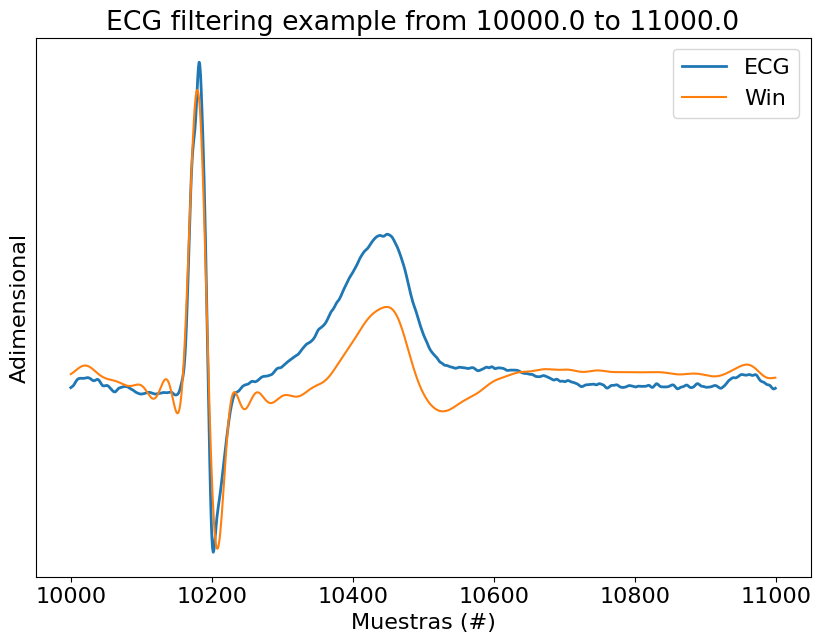

In [12]:
regs_interes = ( 
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', lw=2)
    #plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    plt.plot(zoom_region, ECG_f_win[zoom_region], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

Como se observa, la señal de ECG ha sido alterada en su morfología, a pesar de que **la fase no pudo haber sido la responsable** luego de haber usado el filtrado bidireccional. El complejo de ondas QRS, es decir las primeras deflecciones rápidas de mayor energía relacionadas con la compresión muscular, han sido claramente atenuadas, mientras que la onda T, la segunda onda positiva de mayor duración y relacionada con la relajación muscular, ha sido también atenuada. También se observan otros artefactos ocasionados por el filtrado lineal, como **oscilaciones que no estaban presentes en el ECG original**. Estas observaciones dan cuenta, que estos filtros no son adecuados para esta tarea y es necesario su rediseño teniendo en cuenta estos aspectos.

Quedan pendiente las siguientes cuestiones, en caso que los filtros no se hayan comportado de acuerdo a lo esperado:

  1. ¿Qué pudo haber causado que los filtros no hayan sido **eficientes** para eliminar las interferencias? 
  2. ¿Qué pudo haber causado que los filtros no hayan sido **inocuos** respecto a las señales NO contaminadas? 
  
Y en caso que los filtros hayan funcionado como esperaba, reflexione sobre cómo los utilizaría en una arquitectura digital como las usadas en las **Informáticas** o las **Técnicas Digitales**.
  

# Escriba aquí su respuesta

### Parte  1

## IIR Metodo Directo

In [89]:
import numpy as np

# Plantilla

ws1 = 1   # Hz
wp1 = 3   # Hz
wp2 = 25  # Hz
ws2 = 35  # Hz

fs = 1000 # Hz
nyq_frec = fs / 2

fpass = np.array([wp1, wp2])
ripple = 0.5 # dB
fstop = np.array([ws1, ws2]) 
attenuation = 40 # dB

aprox_name = 'butter'
filter_type = 'bandpass'

frecs = np.array([0.0, ws1, wp1, wp2, ws2, nyq_frec]) / nyq_frec
gains = np.array([-attenuation, -attenuation, -ripple, -ripple, -attenuation, -attenuation])
gains = 10**(gains/20)

#orderz, wcutofz = sig.buttord(fpass, fstop, ripple, attenuation, analog=False)

#numz, denz = sig.iirfilter(orderz, wcutofz, rp=ripple, rs=attenuation, btype=filter_type, analog=False, ftype=aprox_name)

iir_digital_filter = sig.iirdesign(fpass, fstop, ripple, attenuation, ftype = 'butter', output = 'sos', fs = fs)

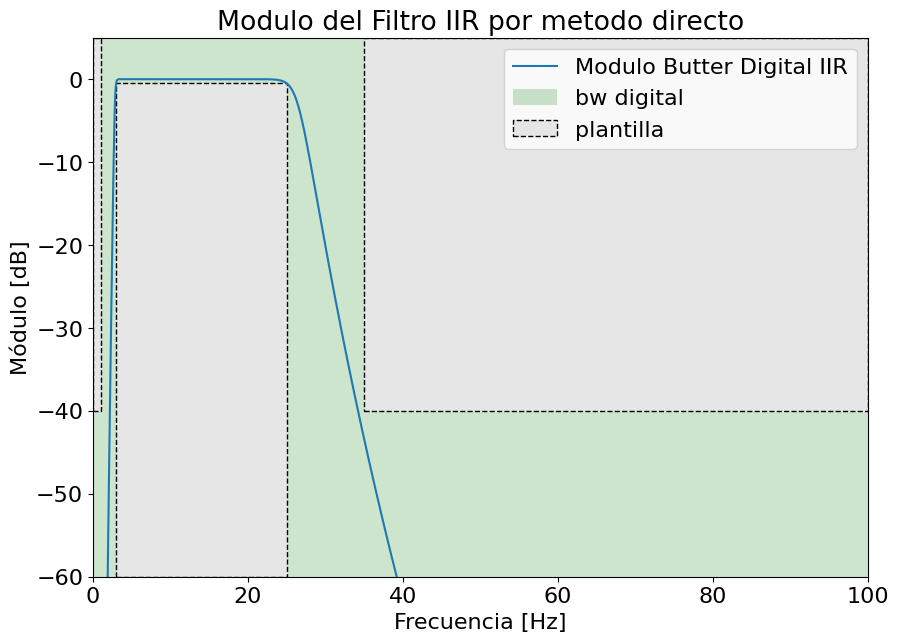

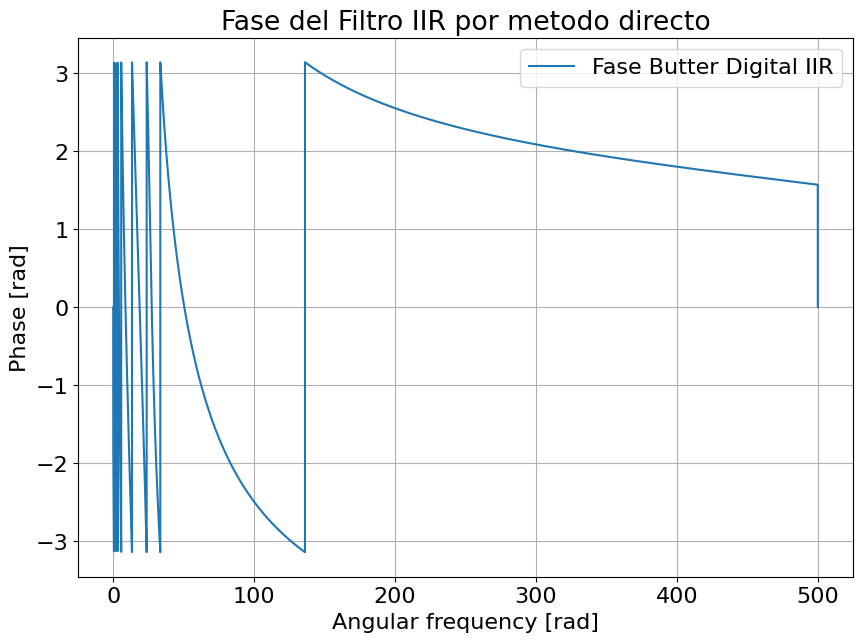

In [91]:
from pytc2.sistemas_lineales import GroupDelay

freq = np.linspace(0, 500, 100000) 

w_dig, h_dig = sig.sosfreqz(iir_digital_filter, worN = freq, fs = fs)
mod_dig = np.abs(h_dig)
phase_dig = np.angle(h_dig)

########################################################################

plt.figure(1)

plt.plot(w_dig, 20*np.log10(mod_dig), label = 'Modulo Butter Digital IIR')

ax_phase.set(xscale='log')
plt.legend()
plt.grid()
plt.ylabel('Magnitude [dB]')
plt.title('Magnitude response')

plt.title('Modulo del Filtro IIR por metodo directo')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, 100, -60, 5]);

axes_hdl = plt.gca()
axes_hdl.legend()

plot_plantilla(filter_type = 'bandpass', fpass = fpass, ripple = ripple , fstop = fstop, attenuation = attenuation, fs = fs)

plt.figure(2)

plt.plot(w_dig, phase_dig, label = 'Fase Butter Digital IIR')

ax_phase.set(xscale='log')
plt.legend()
plt.grid()
plt.xlabel('Angular frequency [rad]')
plt.ylabel('Phase [rad]')
plt.title('Fase del Filtro IIR por metodo directo')

plt.show()

## Filtro FIR (Pasa-Altos) por ventaneo

In [174]:
from scipy import signal as sig
import matplotlib.pyplot as plt
import numpy as np

from pytc2.sistemas_lineales import plot_plantilla

cantcoef= 3501
antisymmetric = False

# Por si quiero forzar un tipo de FIR

#tipo_fir = 1 # Sin restricciones.
# tipo_fir = 2 # pasabajos
# tipo_fir = 3 # pasabandas, Hilbert
tipo_fir = 4 # pasaaltos, diferenciadores

if( (tipo_fir == 2 or tipo_fir == 4) and cant_coef%2 == 1 ):
    
    # fuerzo par
    cantcoef += 1

if( (tipo_fir == 1 or tipo_fir == 3) and cant_coef%2 == 0 ):
    
    # fuerzo impar
    cant_coef += 1

if( (tipo_fir == 1 or tipo_fir == 2) and antisymmetric ):
   
    antisymmetric = False

if( (tipo_fir == 3 or tipo_fir == 4) and (not antisymmetric) ):
   
    antisymmetric = True

#####################
## tipos de filtro ##
#####################

#filter_type = 'arbitrary'
# filter_type = 'lowpass'
filter_type = 'highpass'
# filter_type = 'bandpass'
# filter_type = 'bandstop'

# plantilla

fs = 1000 # Hz
nyq_frec = fs / 2

ripple = 0.5 # dB
attenuation = 40.0 # dB

fstop = 1.0 # Hz
fpass = 3.0 # Hz

# pasa alto

frecs_PA = np.array([0.0, ws1, wp1, nyq_frec]) / nyq_frec
gains_PA = np.array([-atenuacion, -atenuacion, -ripple, 0.0])
gains_PA = 10**(gains_PA/20)

# algunas ventanas para evaluar
#win_name = 'boxcar'
#win_name = 'hamming'
win_name = 'blackmanharris'
#win_name = 'flattop'

# FIR design

num_PA = sig.firwin2(cantcoef, frecs_PA, gains_PA, window='blackmanharris')
den_PA = [1]

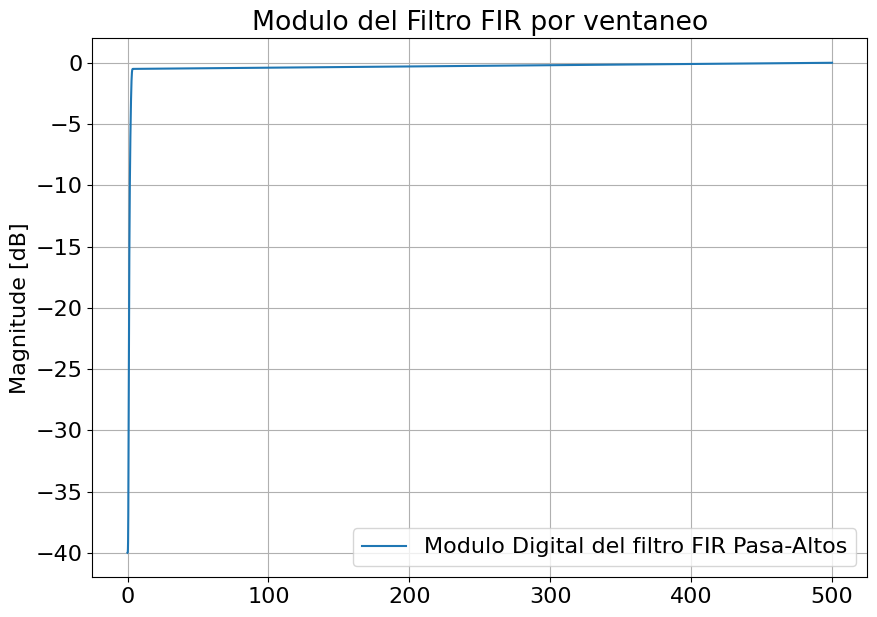

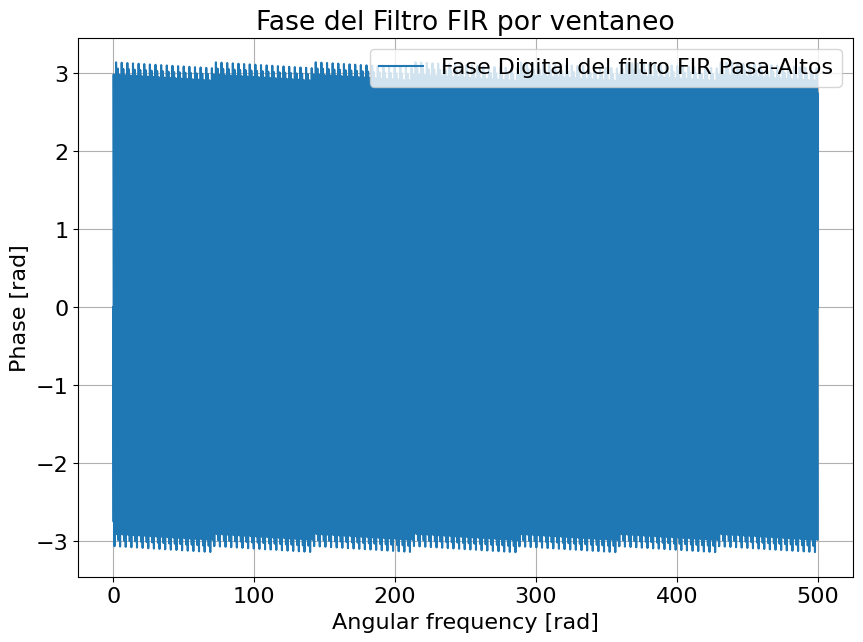

In [175]:
freq = np.linspace(0, 500, 10000) 

w_dig, h_dig = sig.freqz(num_PA, den_PA, worN = freq, fs = fs)
mod_dig = np.abs(h_dig)
phase_dig = np.angle(h_dig)

########################################################################

plt.figure(1)

plt.plot(w_dig, 20*np.log10(mod_dig), label='Modulo Digital del filtro FIR Pasa-Altos')

plt.title('Modulo del Filtro FIR por ventaneo')
plt.legend()
plt.grid()
plt.ylabel('Magnitude [dB]')

plt.figure(2)

plt.plot(w_dig, phase_dig, label = 'Fase Digital del filtro FIR Pasa-Altos')

ax_phase.set(xscale='log')
plt.legend()
plt.grid()
plt.xlabel('Angular frequency [rad]')
plt.ylabel('Phase [rad]')
plt.title('Fase del Filtro FIR por ventaneo')

plt.show()

## Filtro FIR (Pasa-Bajos) por ventaneo

In [176]:
from scipy import signal as sig
import matplotlib.pyplot as plt
import numpy as np

from pytc2.sistemas_lineales import plot_plantilla

antisymmetric = False
cant_coef = 3500

# Por si quiero forzar un tipo de FIR

#tipo_fir = 1 # Sin restricciones.
tipo_fir = 2 # pasabajos
# tipo_fir = 3 # pasabandas, Hilbert
#tipo_fir = 4 # pasaaltos, diferenciadores

if( (tipo_fir == 2 or tipo_fir == 4) and cant_coef%2 == 1 ):
    
    # fuerzo par
    cant_coef += 1

if( (tipo_fir == 1 or tipo_fir == 3) and cant_coef%2 == 0 ):
    
    # fuerzo impar
    cant_coef += 1

if( (tipo_fir == 1 or tipo_fir == 2) and antisymmetric ):
   
    antisymmetric = False

if( (tipo_fir == 3 or tipo_fir == 4) and (not antisymmetric) ):
   
    antisymmetric = True

#####################
## tipos de filtro ##
#####################

#filter_type = 'arbitrary'
filter_type = 'lowpass'
#filter_type = 'highpass'
# filter_type = 'bandpass'
# filter_type = 'bandstop'

# plantilla

fs = 1000 # Hz
nyq_frec = fs / 2

ripple = 0.5 # dB
attenuation = 40.0 # dB

fpass = 25.0 # Hz
fstop = 35.0 # 

# algunas ventanas para evaluar

#win_name = 'boxcar'
#win_name = 'hamming'
win_name = 'blackmanharris'
#win_name = 'flattop'

# pasa bajos 

Ntaps= 1501

frecs_PB = np.array([0.0, wp2, ws2, nyq_frec]) / nyq_frec
gains_PB = np.array([0.0, -ripple, -atenuacion, -atenuacion])
gains_PB = 10**(gains_PB/20)

num_PB = sig.firwin2(Ntaps, frecs_PB, gains_PB, window='blackmanharris')
den_PB = [1]

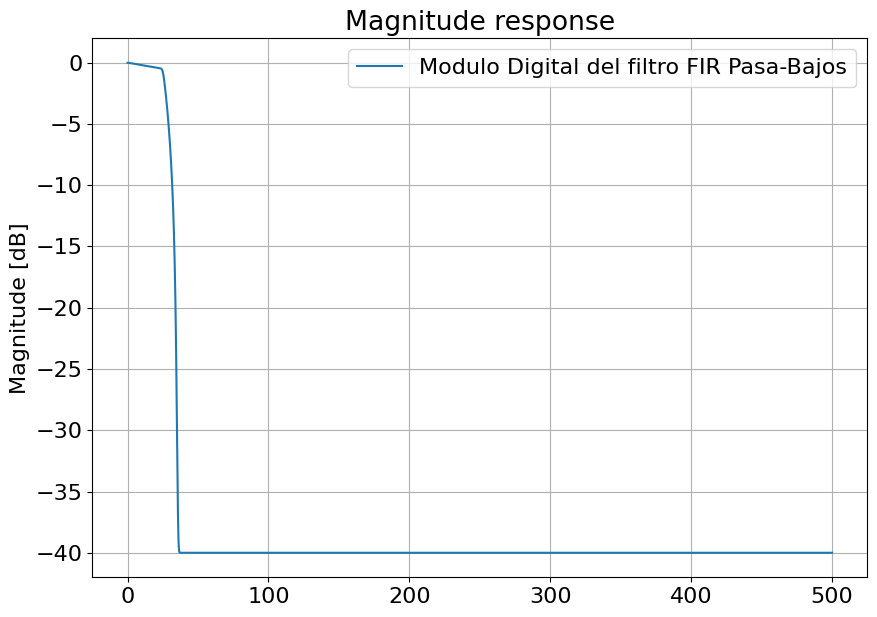

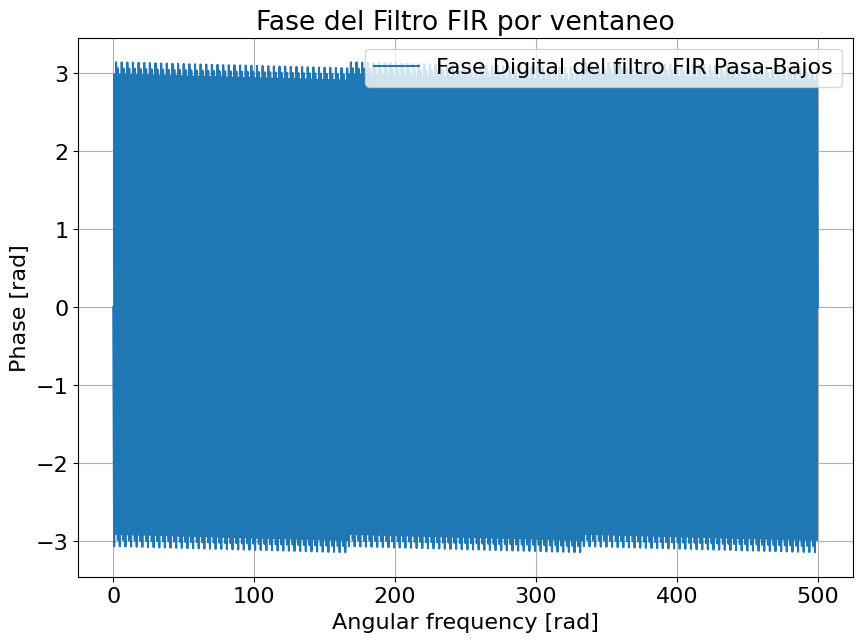

In [177]:
freq = np.linspace(0, 500, 10000)

w_dig, h_dig = sig.freqz(num_PB, 1, worN = freq, fs = fs)
mod_dig = np.abs(h_dig)
phase_dig = np.angle(h_dig)

########################################################################

plt.figure(1)

plt.plot(w_dig, 20*np.log10(mod_dig), label='Modulo Digital del filtro FIR Pasa-Bajos')

plt.legend()
plt.grid()
plt.ylabel('Magnitude [dB]')
plt.title('Magnitude response')

plt.figure(2)

plt.plot(w_dig, phase_dig, label = 'Fase Digital del filtro FIR Pasa-Bajos')

ax_phase.set(xscale='log')
plt.legend()
plt.grid()
plt.xlabel('Angular frequency [rad]')
plt.ylabel('Phase [rad]')
plt.title('Fase del Filtro FIR por ventaneo')

plt.show()

## Cascada

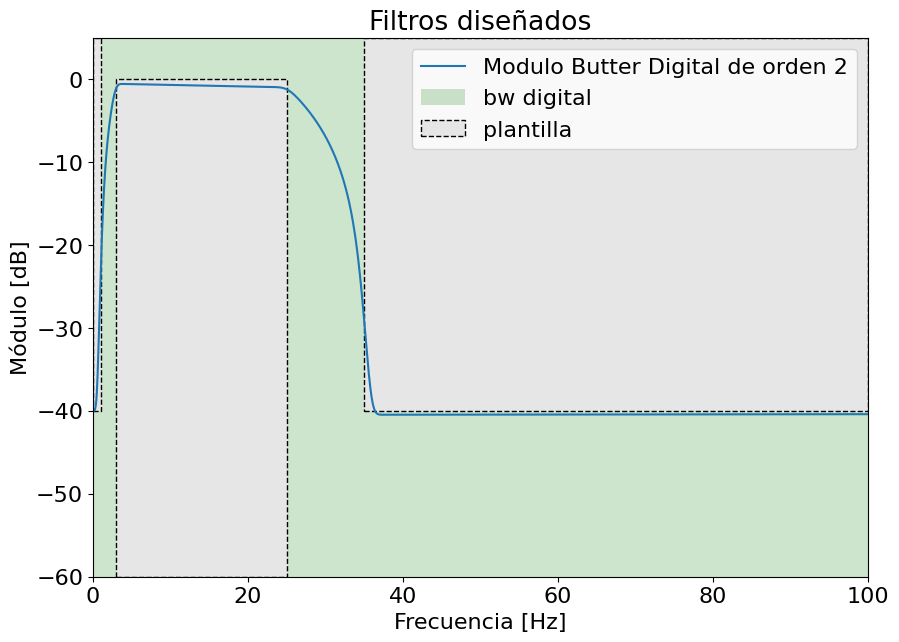

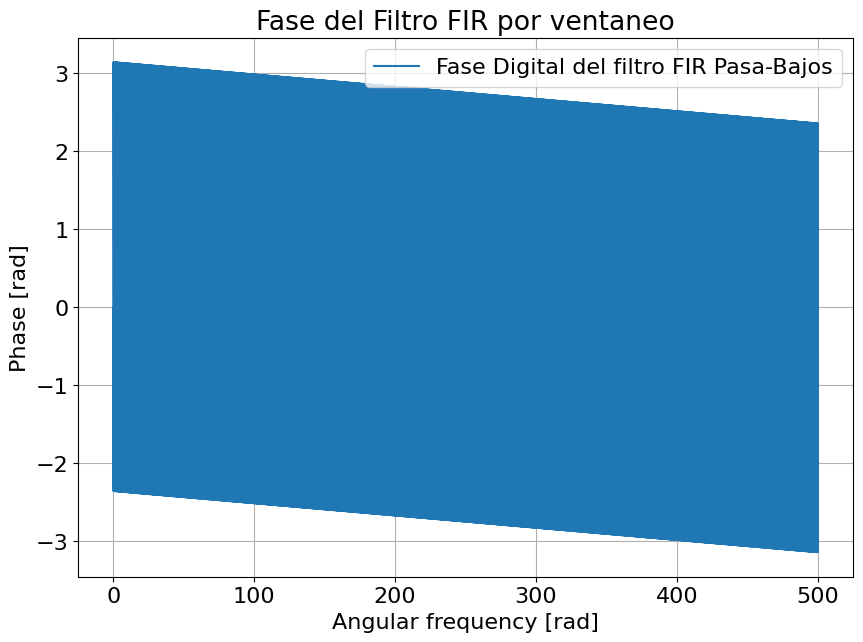

In [171]:
import numpy as np

num_firwin = np.polymul(num_PB, num_PA)

w_dig, h_dig = sig.freqz(num_firwin, 1, worN = freq, fs = fs)
mod_dig = np.abs(h_dig)
phase_dig = np.angle(h_dig)

########################################################################

plt.figure(1)

plt.plot(w_dig, 20*np.log10(mod_dig), label='Modulo Butter Digital de orden 2')

plt.legend()
plt.grid()
plt.ylabel('Magnitude [dB]')
plt.title('Magnitude response')

# Plantilla

ripple = 0 # dB
atenuacion = 40 # dB

ws1 = 1 #Hz
wp1 = 3 #Hz
wp2 = 25 #Hz
ws2 = 35 #Hz

fpass = np.array([wp1, wp2])
fstop = np.array([ws1, ws2]) 

plt.title('Filtros diseñados')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, 100, -60,5 ]);

axes_hdl = plt.gca()
axes_hdl.legend()

plot_plantilla(filter_type = 'bandpass', fpass = fpass, ripple = ripple , fstop = fstop, attenuation = atenuacion, fs = fs)

plt.figure(2)

plt.plot(w_dig, phase_dig, label = 'Fase Digital del filtro FIR Pasa-Bajos')

plt.legend()
plt.grid()
plt.xlabel('Angular frequency [rad]')
plt.ylabel('Phase [rad]')
plt.title('Fase del Filtro FIR por ventaneo')

plt.show()

## Parte 2

### Usando el filtro IIR, filtramos la señal pedida:

In [ ]:
ECG_f_butt = sig.sosfilt(iir_digital_filter, ecg_one_lead)

In [ ]:
# demora = int(...)
# calcule la demora para cada caso, dicha demora adelantará la señal de salida, como puede ver más abajo.
demora = 500


# Segmentos de interés con ALTA contaminación

regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    #plt.plot(zoom_region, ECG_f_win[zoom_region + demora], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

A continuacion revisamos los detalles menos $contaminados:$

In [ ]:
regs_interes = ( 
        [2500, 3500], # muestras
        [10e3, 11e3], # muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    #plt.plot(zoom_region, ECG_f_win[zoom_region + demora], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

Finalmente $filtramos:$

In [ ]:
# Procedemos al filtrado
ECG_f_butt = sig.sosfiltfilt(iir_digital_filter, ecg_one_lead)

#ECG_f_win = sig.filtfilt(num_win, den, ecg_one_lead)

# Segmentos de interés
regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', lw=2)
    plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    #plt.plot(zoom_region, ECG_f_win[zoom_region], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

Volvemos a revisar los detalles menos $contaminados:$

In [ ]:
regs_interes = ( 
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', lw=2)
    #plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    plt.plot(zoom_region, ECG_f_win[zoom_region], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

### Usando el filtro FIR, filtramos la señal pedida:

In [ ]:
ECG_f_win = sig.lfilter(num_firwin, den, ecg_one_lead)

In [ ]:
# demora = int(...)
# calcule la demora para cada caso, dicha demora adelantará la señal de salida, como puede ver más abajo.
demora = 1750


# Segmentos de interés con ALTA contaminación

regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    #plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    plt.plot(zoom_region, ECG_f_win[zoom_region + demora], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

A continuacion revisamos los detalles menos $contaminados:$

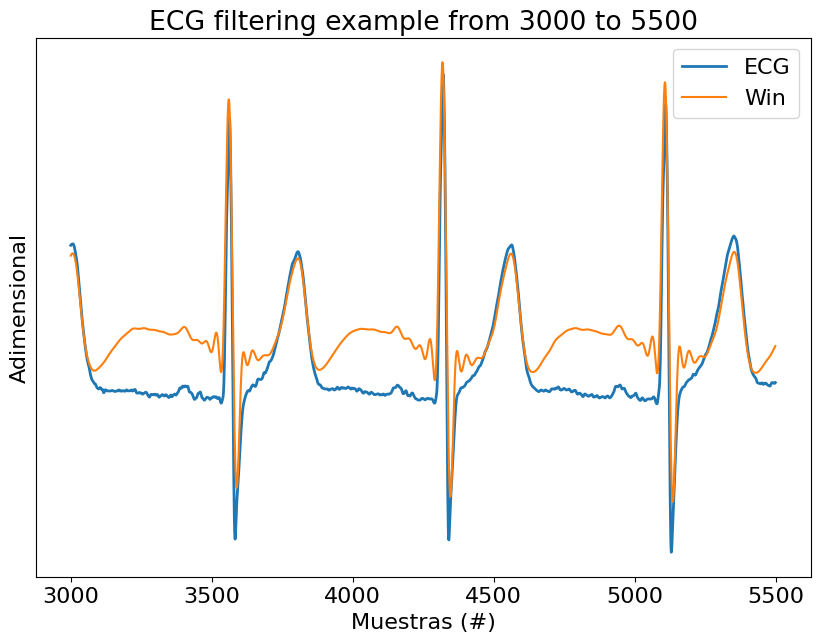

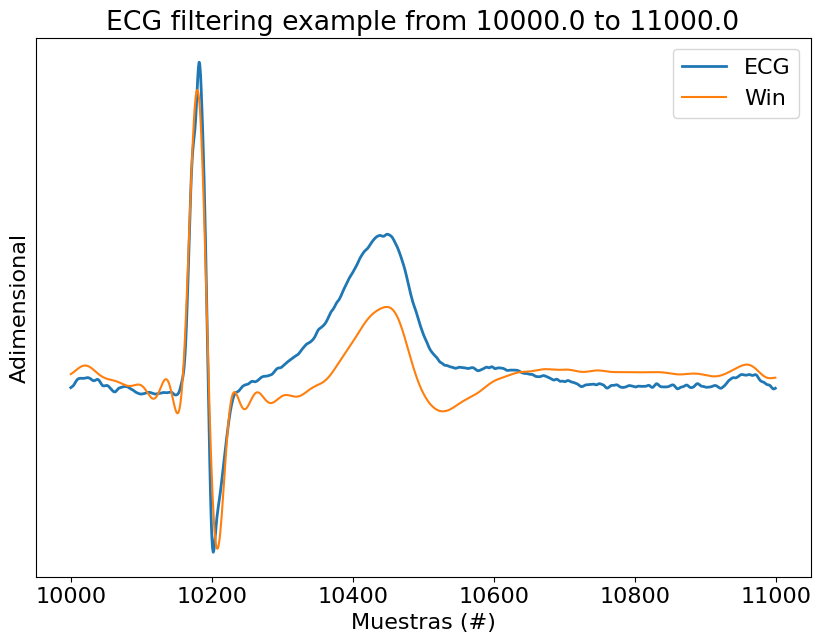

In [181]:
regs_interes = ( 
        [3000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    #plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    plt.plot(zoom_region, ECG_f_win[zoom_region + demora], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

Finalmente $filtramos:$

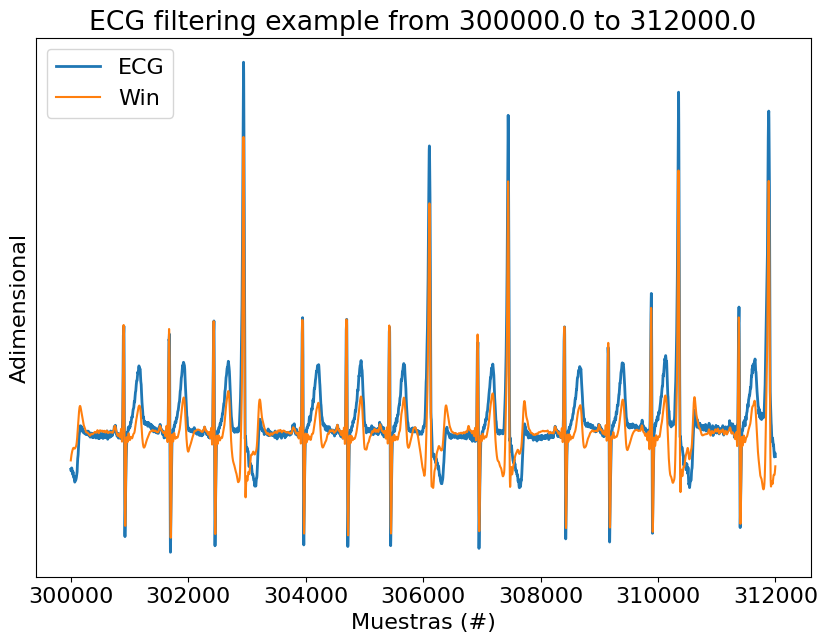

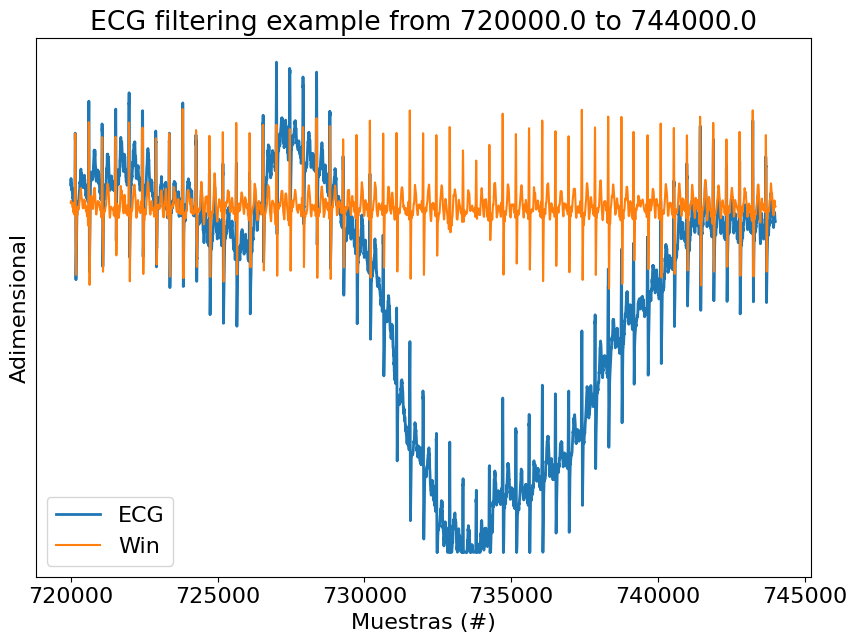

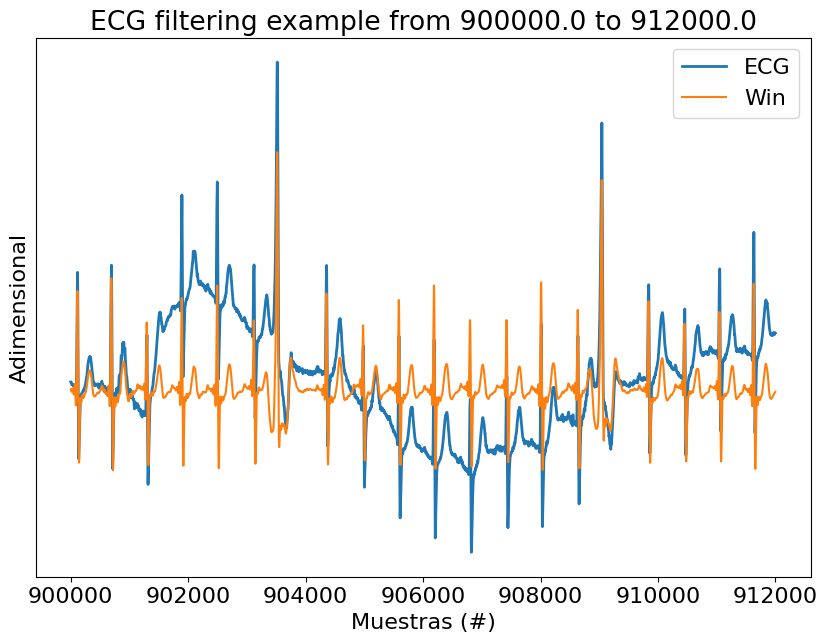

In [180]:
# Procedemos al filtrado
# ECG_f_butt = sig.sosfiltfilt(bp_sos_butter, ecg_one_lead)

ECG_f_win = sig.filtfilt(num_win, den, ecg_one_lead)

# Segmentos de interés
regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', lw=2)
    #plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    plt.plot(zoom_region, ECG_f_win[zoom_region], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()


Volvemos a revisar los detalles menos $contaminados:$

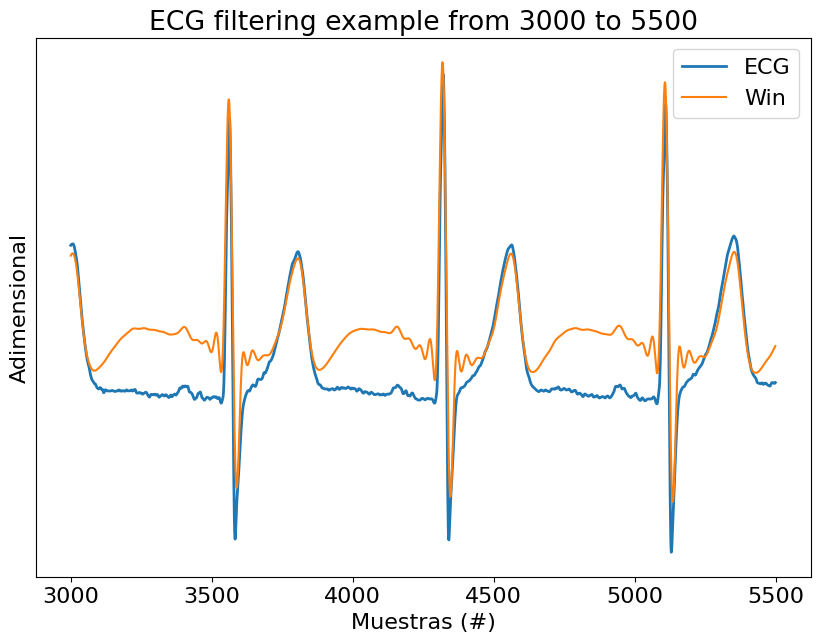

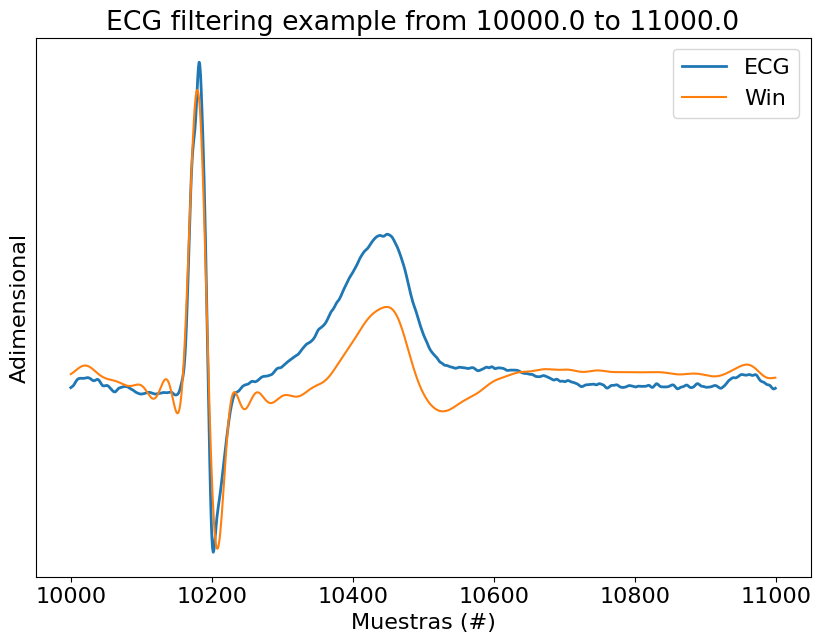

In [179]:
regs_interes = ( 
        [3000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', lw=2)
    #plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    plt.plot(zoom_region, ECG_f_win[zoom_region], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()